# ePD Temperature verification

Verification of DeepThought ePD forecast for Temperature 2022

Obs are from DT 2022 for now, but need to integrate with DDB at some stage to generalize to other predictands

In [45]:
%load_ext autoreload
%autoreload 2

import datetime
from verif.data.obs import ddb
from dt_output import get_dt_output

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Obs from DT

In [2]:
obs = pd.read_parquet('s3://metservice-research-us-west-2/research/experiments/benv/mlpp/data_parquet/obs_TTTTT_2022.parquet')
obs

,forecast_time,TTTTT
stationId,,
93784,2022-01-01T00,21.100000
93784,2022-01-01T01,18.799999
93784,2022-01-01T02,18.233334
93784,2022-01-01T03,19.000000
93784,2022-01-01T04,18.400000
...,...,...
90970,2022-12-31T19,11.700000
90970,2022-12-31T20,14.600000
90970,2022-12-31T21,16.299999


In [3]:
obs_93439 = obs[obs.index=='93439']
obs_93439 = obs_93439.assign(validtime = lambda x : pd.to_datetime(x['forecast_time'])).set_index('validtime')
obs_93439

,forecast_time,TTTTT
validtime,,
2022-01-01 00:00:00,2022-01-01T00,20.400000
2022-01-01 01:00:00,2022-01-01T01,21.299999
2022-01-01 02:00:00,2022-01-01T02,22.833332
2022-01-01 03:00:00,2022-01-01T03,22.750000
2022-01-01 04:00:00,2022-01-01T04,22.900000
...,...,...
2022-12-31 19:00:00,2022-12-31T19,14.900000
2022-12-31 20:00:00,2022-12-31T20,15.133333
2022-12-31 21:00:00,2022-12-31T21,15.580000


## Example for Wellington

In [4]:
dt1 = datetime.datetime(2022,1, 1)
dt2 = datetime.datetime(2022,12, 31)

predictand='TTTTT'
source='S3'
dt_kind='ePD'

In [4]:
# ds = get_dt_output('93439', dt1, dt2, predictand, source, dt_kind, output=None)

opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M1.nc', 'metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M10.nc', 'metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M11.nc', 'metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M12.nc', 'metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M2.nc', 'metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M3.nc', 'metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-

/home/benv/miniconda3/envs/verif/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/benv/miniconda3/envs/verif/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/benv/miniconda3/envs/verif/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/benv/miniconda3/envs/verif/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/benv/miniconda3/envs/verif/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value enco

In [5]:
# ds.to_netcdf('/home/benv/dev/MLPP/data/verif/93439_epd_TTTTT_2022.nc')
ds = xr.open_dataset('/home/benv/dev/MLPP/data/verif/93439_epd_TTTTT_2022.nc')

In [6]:
ds

<xarray.Dataset>
Dimensions:              (basetime: 8728, prognosis_period: 361, pdf_index: 53,
                          pdf_parameter: 2)
Coordinates:
  * basetime             (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period     (prognosis_period) timedelta64[ns] 00:00:00 ... 15 d...
Dimensions without coordinates: pdf_index, pdf_parameter
Data variables: (12/14)
    TTTTT_PDF_parameter  (basetime, prognosis_period, pdf_index, pdf_parameter) float32 ...
    TTTTT_PDF_type       (basetime, prognosis_period, pdf_index) float64 ...
    TTTTT_PDF_weight     (basetime, prognosis_period, pdf_index) float32 ...
    dx                   (basetime, prognosis_period, pdf_index) float32 ...
    quantiles            (basetime, prognosis_period, pdf_index) float32 ...
    left                 (basetime, prognosis_period, pdf_index) float32 ...
    ...                   ...
    validtime            (basetime, prognosis_period) datetime64[ns] ...
    mean                 (basetime, prognosis_period) float32 ...
    var                  (basetime, prognosis_period) float32 ...
    std                  (basetime, prognosis_period) float32 ...
    pdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    cdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

## Mapping Observations

In [7]:
# observation mapping
mapping = dict(zip(pd.to_datetime(obs_93439.index), obs_93439['TTTTT']))
map_func = np.vectorize(lambda x: mapping.get(x, np.nan))

# apply the mapping function to the 'validtime' variable 
obs_TTTTT = map_func(pd.to_datetime(ds['validtime'].values)).astype(np.float32)
# assign with the same dimensions
ds['obs_TTTTT'] = (('basetime', 'prognosis_period'), obs_TTTTT)

In [8]:
ds

<xarray.Dataset>
Dimensions:              (basetime: 8728, prognosis_period: 361, pdf_index: 53,
                          pdf_parameter: 2)
Coordinates:
  * basetime             (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period     (prognosis_period) timedelta64[ns] 00:00:00 ... 15 d...
Dimensions without coordinates: pdf_index, pdf_parameter
Data variables: (12/15)
    TTTTT_PDF_parameter  (basetime, prognosis_period, pdf_index, pdf_parameter) float32 ...
    TTTTT_PDF_type       (basetime, prognosis_period, pdf_index) float64 ...
    TTTTT_PDF_weight     (basetime, prognosis_period, pdf_index) float32 ...
    dx                   (basetime, prognosis_period, pdf_index) float32 ...
    quantiles            (basetime, prognosis_period, pdf_index) float32 ...
    left                 (basetime, prognosis_period, pdf_index) float32 ...
    ...                   ...
    mean                 (basetime, prognosis_period) float32 ...
    var                  (basetime, prognosis_period) float32 ...
    std                  (basetime, prognosis_period) float32 ...
    pdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    cdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    obs_TTTTT            (basetime, prognosis_period) float32 20.4 21.3 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

## P(Obs) and Negative log likelihood

In [9]:
p_obs = xr.apply_ufunc(np.interp,
                       ds['obs_TTTTT'],
                       ds['pdf'].isel(pdf_parameter=0),
                       ds['pdf'].isel(pdf_parameter=1),
                       exclude_dims=set(('pdf_index',)),
                       input_core_dims=[[], ["pdf_index"], ["pdf_index"]],
                       vectorize=True)

In [10]:
ds['p_obs'] = p_obs.astype(np.float32)
ds

<xarray.Dataset>
Dimensions:              (basetime: 8728, prognosis_period: 361, pdf_index: 53,
                          pdf_parameter: 2)
Coordinates:
  * basetime             (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period     (prognosis_period) timedelta64[ns] 00:00:00 ... 15 d...
Dimensions without coordinates: pdf_index, pdf_parameter
Data variables: (12/16)
    TTTTT_PDF_parameter  (basetime, prognosis_period, pdf_index, pdf_parameter) float32 ...
    TTTTT_PDF_type       (basetime, prognosis_period, pdf_index) float64 ...
    TTTTT_PDF_weight     (basetime, prognosis_period, pdf_index) float32 ...
    dx                   (basetime, prognosis_period, pdf_index) float32 ...
    quantiles            (basetime, prognosis_period, pdf_index) float32 ...
    left                 (basetime, prognosis_period, pdf_index) float32 ...
    ...                   ...
    var                  (basetime, prognosis_period) float32 ...
    std                  (basetime, prognosis_period) float32 ...
    pdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    cdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    obs_TTTTT            (basetime, prognosis_period) float32 20.4 21.3 ... nan
    p_obs                (basetime, prognosis_period) float32 0.1272 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

In [11]:
ds['negloglik'] = -np.log(ds['p_obs'])
ds

<xarray.Dataset>
Dimensions:              (basetime: 8728, prognosis_period: 361, pdf_index: 53,
                          pdf_parameter: 2)
Coordinates:
  * basetime             (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period     (prognosis_period) timedelta64[ns] 00:00:00 ... 15 d...
Dimensions without coordinates: pdf_index, pdf_parameter
Data variables: (12/17)
    TTTTT_PDF_parameter  (basetime, prognosis_period, pdf_index, pdf_parameter) float32 ...
    TTTTT_PDF_type       (basetime, prognosis_period, pdf_index) float64 ...
    TTTTT_PDF_weight     (basetime, prognosis_period, pdf_index) float32 ...
    dx                   (basetime, prognosis_period, pdf_index) float32 ...
    quantiles            (basetime, prognosis_period, pdf_index) float32 ...
    left                 (basetime, prognosis_period, pdf_index) float32 ...
    ...                   ...
    std                  (basetime, prognosis_period) float32 ...
    pdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    cdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    obs_TTTTT            (basetime, prognosis_period) float32 20.4 21.3 ... nan
    p_obs                (basetime, prognosis_period) float32 0.1272 ... nan
    negloglik            (basetime, prognosis_period) float32 2.062 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

## Cumulative Probability (for PIT histogram)



In [18]:
cp_obs = xr.apply_ufunc(np.interp,
                       ds['obs_TTTTT'],
                       ds['cdf'].isel(pdf_parameter=0),
                       ds['cdf'].isel(pdf_parameter=1),
                       exclude_dims=set(('pdf_index',)),
                       input_core_dims=[[], ["pdf_index"], ["pdf_index"]],
                       vectorize=True)

(array([340195., 295594., 289463., 288741., 288818., 303262., 318122.,
        343234., 357426., 267564.]),
 array([0.001     , 0.10089998, 0.20079995, 0.30069993, 0.4005999 ,
        0.50049988, 0.60039986, 0.70029983, 0.80019981, 0.90009979,
        0.99999976]),
 <BarContainer object of 10 artists>)

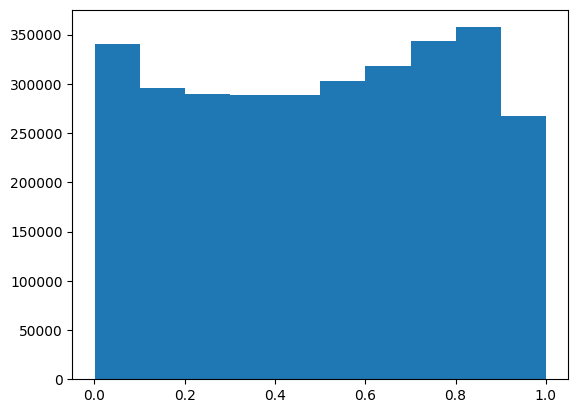

In [19]:
cp_obs.plot.hist()

In [20]:
ds['cp_obs'] = cp_obs.astype(np.float32)

## CRPS

In [21]:
import properscoring as ps

In [ ]:
# 15 minutes for one year / station
crps = xr.apply_ufunc(ps.crps_ensemble,
                       ds['obs_TTTTT'],
                       ds['pdf'].isel(pdf_parameter=0),
                       ds['pdf'].isel(pdf_parameter=1),
                       exclude_dims=set(('pdf_index',)),
                       input_core_dims=[[], ["pdf_index"], ["pdf_index"]],
                       vectorize=True)

In [ ]:
ds['crps'] = crps.astype(np.float32)

In [27]:
ds['cp_obs'] = ds['pit'].astype(np.float32)

In [ ]:
# ds.to_netcdf('/home/benv/dev/MLPP/data/verif/93439_epd_TTTTT_2022_verif.nc')

In [28]:
#ds = xr.open_dataset('/home/benv/dev/MLPP/data/verif/93439_epd_TTTTT_2022_verif.nc')
ds

<xarray.Dataset>
Dimensions:              (basetime: 8728, prognosis_period: 361, pdf_index: 53,
                          pdf_parameter: 2)
Coordinates:
  * basetime             (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period     (prognosis_period) timedelta64[ns] 00:00:00 ... 15 d...
Dimensions without coordinates: pdf_index, pdf_parameter
Data variables: (12/20)
    TTTTT_PDF_parameter  (basetime, prognosis_period, pdf_index, pdf_parameter) float32 ...
    TTTTT_PDF_type       (basetime, prognosis_period, pdf_index) float64 ...
    TTTTT_PDF_weight     (basetime, prognosis_period, pdf_index) float32 ...
    dx                   (basetime, prognosis_period, pdf_index) float32 ...
    quantiles            (basetime, prognosis_period, pdf_index) float32 ...
    left                 (basetime, prognosis_period, pdf_index) float32 ...
    ...                   ...
    negloglik            (basetime, prognosis_period) float32 ...
    crps                 (basetime, prognosis_period) float32 1.138 ... nan
    pit                  (basetime, prognosis_period) float64 ...
    pdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    cdf                  (pdf_parameter, basetime, prognosis_period, pdf_index) float32 ...
    cp_obs               (basetime, prognosis_period) float32 0.09212 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

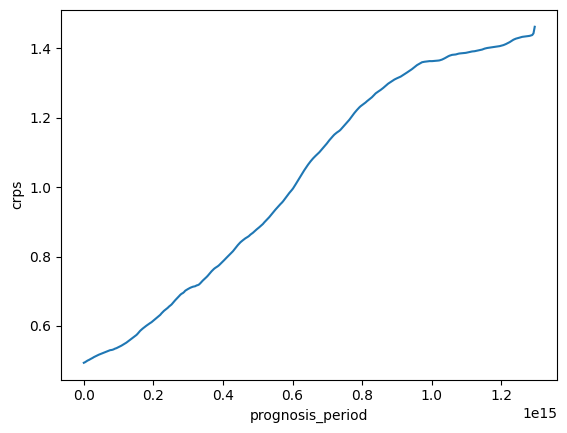

In [5]:
ds['crps'].mean(dim='basetime').plot() #.groupby('prognosis_period').mean()

(array([6.403100e+05, 1.257602e+06, 6.310930e+05, 3.200370e+05,
        1.558710e+05, 6.408300e+04, 1.911200e+04, 3.869000e+03,
        4.070000e+02, 3.500000e+01]),
 array([6.14531629e-04, 9.66674313e-02, 1.92720339e-01, 2.88773239e-01,
        3.84826154e-01, 4.80879039e-01, 5.76931953e-01, 6.72984838e-01,
        7.69037724e-01, 8.65090668e-01, 9.61143553e-01]),
 <BarContainer object of 10 artists>)

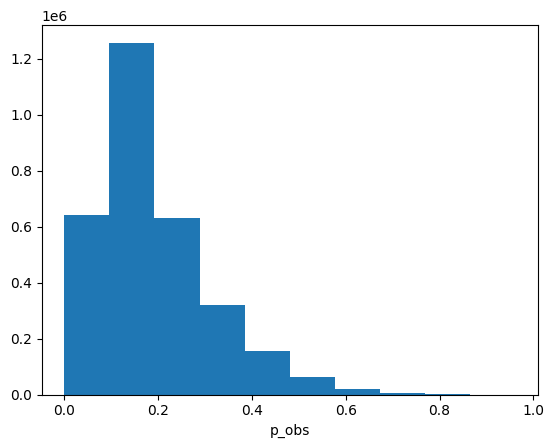

In [39]:
ds['p_obs'].plot.hist()

# Output File

Removing full distributions

In [38]:
ds_verif_ouput = ds[['validtime', 'obs_TTTTT', 'mean', 'var', 'std', 'p_obs', 'cp_obs', 'negloglik', 'crps']]

In [42]:
ds_verif_ouput

<xarray.Dataset>
Dimensions:           (basetime: 8728, prognosis_period: 361)
Coordinates:
  * basetime          (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] ...
    obs_TTTTT         (basetime, prognosis_period) float32 ...
    mean              (basetime, prognosis_period) float32 ...
    var               (basetime, prognosis_period) float32 ...
    std               (basetime, prognosis_period) float32 ...
    p_obs             (basetime, prognosis_period) float32 ...
    cp_obs            (basetime, prognosis_period) float32 0.09212 0.283 ... nan
    negloglik         (basetime, prognosis_period) float32 ...
    crps              (basetime, prognosis_period) float32 1.138 0.4329 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

In [ ]:
# ds_verif_ouput.to_netcdf('/home/benv/dev/MLPP/data/verif/93439_epd_TTTTT_2022_verif_out.nc')

# Function Test

In [46]:
from verif.dt.dt_verif import verify_dt_ouput

In [81]:
dt_start = datetime.datetime(2022,11, 1)
dt_end = datetime.datetime(2022,11, 30)

station = '93439'
predictand='TTTTT'
source='S3'
dt_kind='ePD'

ds_verif = verify_dt_ouput(station, dt_start, dt_end, predictand, dt_kind)

opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2022-M11.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


In [82]:
ds_verif

<xarray.Dataset>
Dimensions:           (basetime: 692, prognosis_period: 361)
Coordinates:
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
  * basetime          (basetime) datetime64[ns] 2022-11-01 ... 2022-11-30
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] 2022-11-01 ...
    obs_TTTTT         (basetime, prognosis_period) float32 18.0 18.7 ... 17.8
    mean              (basetime, prognosis_period) float32 17.62 17.83 ... 18.13
    var               (basetime, prognosis_period) float32 0.7042 ... 12.85
    std               (basetime, prognosis_period) float32 1.147 1.167 ... 3.402
    p_obs             (basetime, prognosis_period) float32 0.4436 ... 0.1445
    cp_obs            (basetime, prognosis_period) float32 0.6903 ... 0.4507
    negloglik         (basetime, prognosis_period) float32 0.8129 ... 1.935
    crps              (basetime, prognosis_period) float32 0.2272 ... 0.4773
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

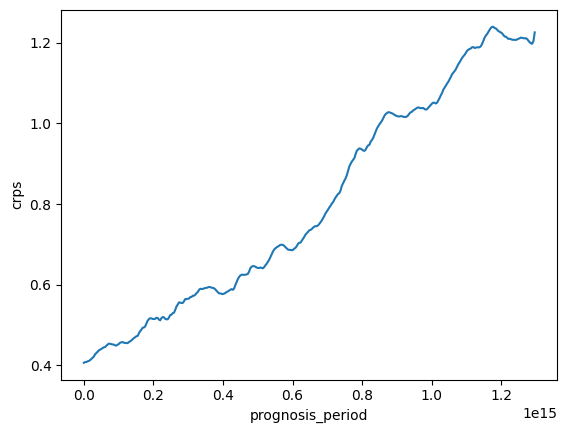

In [102]:
ds_verif['crps'].mean(dim='basetime').plot()

In [113]:
import boto3
s3 = boto3.client('s3')
ds_verif.to_netcdf('./temp.nc')
s3.upload_file('./temp.nc',
               'metservice-research-us-west-2'
               , f'research/experiments/benv/mlpp/verification/2022/ePD/TTTTT/{station}.nc')



In [112]:
import netCDF4 as nc

with fs_s3.open(f'{s3_mlpp}/verification/2022/ePD/TTTTT/{station}.nc', 'wb') as file_obj:
    with nc.Dataset(file_obj, mode='w') as file:
        ds_verif.to_netcdf(file)


PermissionError: [Errno 13] Permission denied: '<File-like object S3FileSystem, metservice-research-us-west-2/research/experiments/benv/mlpp/verification/2022/ePD/TTTTT/93439.nc>'

In [105]:
file_obj = s3fs.S3Map(root = f'metservice-research-us-west-2/research/experiments/benv/mlpp/verification/2022/ePD/TTTTT/{station}.nc', s3=fs_s3, check=False, create=True)
ds_verif.to_netcdf(file_obj, mode='w')


TypeError: expected str, bytes or os.PathLike object, not FSMap

# Run all stations in NZ 2022

In [114]:
import s3fs
import json
import os
import boto3

fs_s3 = s3fs.S3FileSystem()

s3 = boto3.client('s3')

s3_mlpp = 's3://metservice-research-us-west-2/research/experiments/benv/mlpp'

In [68]:
stations_nz_2022  = json.load(fs_s3.open(
                        s3_mlpp + '/data_parquet/valid_obs_stations.json'))['TTTTT']['2022']

In [79]:
station_list = [station for station in stations_nz_2022
    if fs_s3.exists(f'{s3_mlpp}/data_parquet/2022/ARWECMWFcld_single_nz4km/{station}.parquet')]

In [115]:
dt_start = datetime.datetime(2022,11, 1)
dt_end = datetime.datetime(2022,11, 3)

predictand='TTTTT'
source='S3'
dt_kind='ePD'

for station in station_list:
    ds_verif = verify_dt_ouput(station, dt_start, dt_end, predictand, dt_kind)
    if ds_verif:
        ds_verif.to_netcdf('./temp.nc')
        s3.upload_file('./temp.nc',
                    'metservice-research-us-west-2'
                    , f'research/experiments/benv/mlpp/verification/2022/ePD/TTTTT/{station}.nc')

Empty dataset!
No ePD data for station 55083
Empty dataset!
No ePD data for station 90147
opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/90254/90254-2022-M11.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/90292/90292-2022-M11.nc']
No ePD data for station 90292
opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/90294/90294-2022-M11.nc']
